In [65]:
import pandas as pd
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [10]:
gemini = pd.read_csv("gemini.csv")
gemini.Date = pd.to_datetime(gemini.Date)
gemini["Weekday"] = gemini["Date"].dt.day_name()
gemini["Hour"] = gemini["Date"].dt.hour

# Examine Initial Data Table

In [11]:
gemini.head()

,Date,Open,High,Low,Close,Volume,Weekday,Hour
0,2020-12-09 00:00:00,18318.53,18353.15,18252.62,18252.62,24.352998,Wednesday,0
1,2020-12-08 23:00:00,18333.33,18426.13,18150.75,18318.53,282.845270,Tuesday,23
2,2020-12-08 22:00:00,18781.57,18839.60,18333.33,18333.33,193.963684,Tuesday,22
3,2020-12-08 21:00:00,18742.87,18827.44,18685.86,18781.57,97.104587,Tuesday,21
4,2020-12-08 20:00:00,18798.63,18845.06,18670.46,18742.87,87.857822,Tuesday,20


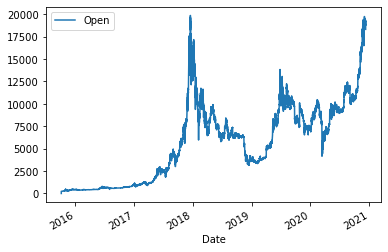

In [12]:
gemini.plot(x='Date',y='Open')

In [13]:
gemini['Change'] = gemini.Open-gemini.Close
gemini.head()

,Date,Open,High,Low,Close,Volume,Weekday,Hour,Change
0,2020-12-09 00:00:00,18318.53,18353.15,18252.62,18252.62,24.352998,Wednesday,0,65.91
1,2020-12-08 23:00:00,18333.33,18426.13,18150.75,18318.53,282.845270,Tuesday,23,14.80
2,2020-12-08 22:00:00,18781.57,18839.60,18333.33,18333.33,193.963684,Tuesday,22,448.24
3,2020-12-08 21:00:00,18742.87,18827.44,18685.86,18781.57,97.104587,Tuesday,21,-38.70
4,2020-12-08 20:00:00,18798.63,18845.06,18670.46,18742.87,87.857822,Tuesday,20,55.76


In [14]:
gemini['ChangePct'] = gemini['Change']*100/gemini['Open']
gemini.head()

,Date,Open,High,Low,Close,Volume,Weekday,Hour,Change,ChangePct
0,2020-12-09 00:00:00,18318.53,18353.15,18252.62,18252.62,24.352998,Wednesday,0,65.91,0.359800
1,2020-12-08 23:00:00,18333.33,18426.13,18150.75,18318.53,282.845270,Tuesday,23,14.80,0.080727
2,2020-12-08 22:00:00,18781.57,18839.60,18333.33,18333.33,193.963684,Tuesday,22,448.24,2.386595
3,2020-12-08 21:00:00,18742.87,18827.44,18685.86,18781.57,97.104587,Tuesday,21,-38.70,-0.206479
4,2020-12-08 20:00:00,18798.63,18845.06,18670.46,18742.87,87.857822,Tuesday,20,55.76,0.296617


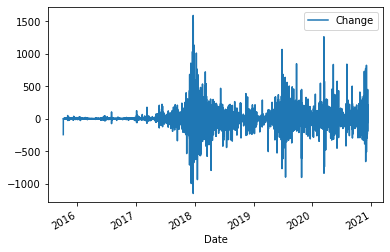

In [15]:
gemini.plot(x='Date',y='Change')

-0.03690678564406512


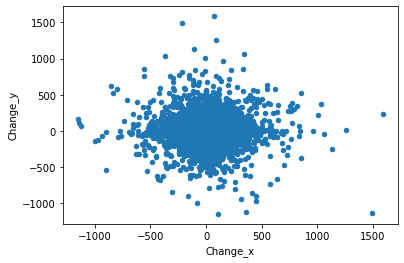

In [16]:
changes = pd.DataFrame({'Change_x':gemini.Change[:-1].reset_index(drop=True), 'Change_y':gemini.Change[1:].reset_index(drop=True), 'ChangePct_x':gemini.ChangePct[:-1].reset_index(drop=True), 'ChangePct_y':gemini.ChangePct[1:].reset_index(drop=True)})
changes.plot(x='Change_x', y="Change_y", kind="scatter")
print(changes.Change_x.corr(changes.Change_y))

In [17]:
(gemini.Change<0).value_counts()

False    22954
True     22367
Name: Change, dtype: int64

In [18]:
gemini["StickLen"] = gemini["High"] - gemini["Low"]
gemini

,Date,Open,High,Low,Close,Volume,Weekday,Hour,Change,ChangePct,StickLen
0,2020-12-09 00:00:00,18318.53,18353.15,18252.62,18252.62,24.352998,Wednesday,0,65.91,0.359800,100.53
1,2020-12-08 23:00:00,18333.33,18426.13,18150.75,18318.53,282.845270,Tuesday,23,14.80,0.080727,275.38
2,2020-12-08 22:00:00,18781.57,18839.60,18333.33,18333.33,193.963684,Tuesday,22,448.24,2.386595,506.27
3,2020-12-08 21:00:00,18742.87,18827.44,18685.86,18781.57,97.104587,Tuesday,21,-38.70,-0.206479,141.58
4,2020-12-08 20:00:00,18798.63,18845.06,18670.46,18742.87,87.857822,Tuesday,20,55.76,0.296617,174.60
...,...,...,...,...,...,...,...,...,...,...,...
45316,2015-10-08 17:00:00,244.25,244.99,244.02,244.99,3.920632,Thursday,17,-0.74,-0.302968,0.97
45317,2015-10-08 16:00:00,244.92,244.92,244.25,244.25,3.895252,Thursday,16,0.67,0.273559,0.67
45318,2015-10-08 15:00:00,245.00,245.00,244.92,244.92,3.016926,Thursday,15,0.08,0.032653,0.08
45319,2015-10-08 14:00:00,245.00,245.00,244.50,245.00,4.453649,Thursday,14,0.00,0.000000,0.50


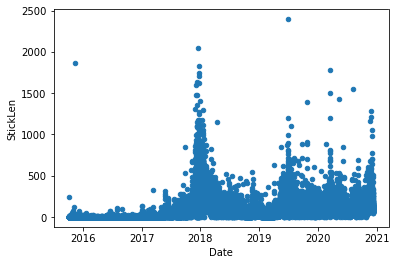

In [19]:
gemini["StickLen30RollingAvg"] = gemini["StickLen"].rolling(30).mean().shift(1)
gemini["StickLen30RollingStd"] = gemini["StickLen"].rolling(30).std().shift(1)
gemini.plot(x="Date",y="StickLen", kind="scatter")


In [20]:
gemini.groupby(['Weekday'])['Volume'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
Friday,6480.0,177.074639,353.081724,0.0,28.382964,75.013369,185.366703,8190.758486
Monday,6480.0,154.112150,287.585826,0.0,24.327073,68.145663,169.598679,8526.751048
Saturday,6480.0,86.527779,151.313082,0.0,9.539748,29.579805,95.344411,1970.487900
Sunday,6480.0,88.975289,181.473156,0.0,8.272791,27.575862,88.294728,3135.605196
Thursday,6467.0,189.290933,366.354469,0.0,28.942733,78.433776,199.339359,7262.809279
Tuesday,6479.0,168.454169,289.055456,0.0,28.103245,76.602961,184.684960,4528.130078
Wednesday,6455.0,176.788881,280.776732,0.0,28.532697,81.445618,202.918654,4277.891500


In [21]:
gemini = gemini.iloc[29:]
gemini

,Date,Open,High,Low,Close,Volume,Weekday,Hour,Change,ChangePct,StickLen,StickLen30RollingAvg,StickLen30RollingStd
29,2020-12-07 19:00:00,18954.27,19042.50,18914.67,18968.77,136.068783,Monday,19,-14.50,-0.076500,127.83,NaN,NaN
30,2020-12-07 18:00:00,19174.95,19202.95,18908.00,18954.27,154.990951,Monday,18,220.68,1.150877,294.95,151.888333,102.106096
31,2020-12-07 17:00:00,19199.18,19223.73,19150.00,19174.95,31.968765,Monday,17,24.23,0.126203,73.73,158.369000,104.866579
32,2020-12-07 16:00:00,19231.60,19257.39,19190.89,19199.18,41.494515,Monday,16,32.42,0.168577,66.50,151.647333,103.562366
33,2020-12-07 15:00:00,19209.75,19272.05,19185.93,19231.60,32.750336,Monday,15,-21.85,-0.113744,86.12,136.988333,80.102518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45316,2015-10-08 17:00:00,244.25,244.99,244.02,244.99,3.920632,Thursday,17,-0.74,-0.302968,0.97,0.484333,1.400445
45317,2015-10-08 16:00:00,244.92,244.92,244.25,244.25,3.895252,Thursday,16,0.67,0.273559,0.67,0.516667,1.400075
45318,2015-10-08 15:00:00,245.00,245.00,244.92,244.92,3.016926,Thursday,15,0.08,0.032653,0.08,0.539000,1.396889
45319,2015-10-08 14:00:00,245.00,245.00,244.50,245.00,4.453649,Thursday,14,0.00,0.000000,0.50,0.367667,1.082875


In [38]:
def is_hammer_shape(row):
    U = .035
    L = 2
    upper_shadow = row['High'] - max(row.Open, row.Close)
    lower_shadow = min(row.Open, row.Close) - row.Low
    real_body = max(row.Open, row.Close) - min(row.Open, row.Close)
    candle_len = row.High - row.Low
    return candle_len > 0 and upper_shadow/candle_len < U and lower_shadow > L*real_body

In [49]:
gemini.loc[:, 'is_hammer'] = gemini.apply(is_hammer_shape, axis=1)

In [52]:
hammers = gemini[gemini.is_hammer]
print(f'{len(hammers)} hammers in {len(gemini)} points; {len(hammers)/len(gemini)}')

2195 hammers in 45292 points; 0.04846330477788572


In [54]:
gemini.loc[:,'increase?'] = gemini['Change'] > 0
gemini

C:\Users\jboswell\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jboswell\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Date,Open,High,Low,Close,Volume,Weekday,Hour,Change,ChangePct,StickLen,StickLen30RollingAvg,StickLen30RollingStd,is_hammer,increase?
29,2020-12-07 19:00:00,18954.27,19042.50,18914.67,18968.77,136.068783,Monday,19,-14.50,-0.076500,127.83,NaN,NaN,False,False
30,2020-12-07 18:00:00,19174.95,19202.95,18908.00,18954.27,154.990951,Monday,18,220.68,1.150877,294.95,151.888333,102.106096,False,True
31,2020-12-07 17:00:00,19199.18,19223.73,19150.00,19174.95,31.968765,Monday,17,24.23,0.126203,73.73,158.369000,104.866579,False,True
32,2020-12-07 16:00:00,19231.60,19257.39,19190.89,19199.18,41.494515,Monday,16,32.42,0.168577,66.50,151.647333,103.562366,False,True
33,2020-12-07 15:00:00,19209.75,19272.05,19185.93,19231.60,32.750336,Monday,15,-21.85,-0.113744,86.12,136.988333,80.102518,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45316,2015-10-08 17:00:00,244.25,244.99,244.02,244.99,3.920632,Thursday,17,-0.74,-0.302968,0.97,0.484333,1.400445,False,False
45317,2015-10-08 16:00:00,244.92,244.92,244.25,244.25,3.895252,Thursday,16,0.67,0.273559,0.67,0.516667,1.400075,False,True
45318,2015-10-08 15:00:00,245.00,245.00,244.92,244.92,3.016926,Thursday,15,0.08,0.032653,0.08,0.539000,1.396889,False,True
45319,2015-10-08 14:00:00,245.00,245.00,244.50,245.00,4.453649,Thursday,14,0.00,0.000000,0.50,0.367667,1.082875,True,False


In [68]:
def trend(x):
    P = .75
    D = .005
    
    length = len(x)
    down_counts = np.sum(x<0)
    up_counts = np.sum(x>0)
    delta = x.sum()
    
    if up_counts/length >= P and delta > 0 and x[length-1] > 0:
        return 1
    elif down_counts/length >= P and delta < 0 and x[length-1] < 0:
        return -1
    else:
        return 0
    
gemini['Trend'] = gemini.Change.rolling(window=4).apply(trend, raw=True)
gemini

<ipython-input-68-7c91abacb904>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gemini['Trend'] = gemini.Change.rolling(window=4).apply(trend, raw=True)


,Date,Open,High,Low,Close,Volume,Weekday,Hour,Change,ChangePct,StickLen,StickLen30RollingAvg,StickLen30RollingStd,is_hammer,increase?,Trend
29,2020-12-07 19:00:00,18954.27,19042.50,18914.67,18968.77,136.068783,Monday,19,-14.50,-0.076500,127.83,NaN,NaN,False,False,NaN
30,2020-12-07 18:00:00,19174.95,19202.95,18908.00,18954.27,154.990951,Monday,18,220.68,1.150877,294.95,151.888333,102.106096,False,True,NaN
31,2020-12-07 17:00:00,19199.18,19223.73,19150.00,19174.95,31.968765,Monday,17,24.23,0.126203,73.73,158.369000,104.866579,False,True,NaN
32,2020-12-07 16:00:00,19231.60,19257.39,19190.89,19199.18,41.494515,Monday,16,32.42,0.168577,66.50,151.647333,103.562366,False,True,1.0
33,2020-12-07 15:00:00,19209.75,19272.05,19185.93,19231.60,32.750336,Monday,15,-21.85,-0.113744,86.12,136.988333,80.102518,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45316,2015-10-08 17:00:00,244.25,244.99,244.02,244.99,3.920632,Thursday,17,-0.74,-0.302968,0.97,0.484333,1.400445,False,False,0.0
45317,2015-10-08 16:00:00,244.92,244.92,244.25,244.25,3.895252,Thursday,16,0.67,0.273559,0.67,0.516667,1.400075,False,True,0.0
45318,2015-10-08 15:00:00,245.00,245.00,244.92,244.92,3.016926,Thursday,15,0.08,0.032653,0.08,0.539000,1.396889,False,True,1.0
45319,2015-10-08 14:00:00,245.00,245.00,244.50,245.00,4.453649,Thursday,14,0.00,0.000000,0.50,0.367667,1.082875,True,False,0.0


In [80]:
L = gemini[(gemini['is_hammer']==True) & (gemini['Trend']==-1.0)].index
print(f'The percentage of times the price increased after a hammer occurred during a downtrend: {100*gemini.loc[L+1]["increase?"].sum()/len(L)}')
L2 = gemini[(gemini['is_hammer']==True) & (gemini['Trend']==-1.0)] & gemini[]

The percentage of times the price increased after a hammer occurred during a downtrend: 49.32432432432432
